In [88]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("data/fy24-adopted-operating-budget.csv")
df.head()

,Cabinet,Dept,Program,Expense Category,FY21 Actual Expense,FY22 Actual Expense,FY23 Appropriation,FY24 Adopted
0,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1820538.46,1624903.69,1584054.209,1921403.81
1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,127557.82,284597.9,99314,219633.42
2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,27318.17,28541.55,44938,55573.65
3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,11365.77,19410.3,29630,16734.29
4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,39040.6,16164.36,24900,36115


In [71]:
def sanitize_numeric_col(df, col):
    try:
        df[col] = df[col].str.strip()
    except AttributeError:
        return df
    df.drop(df[df[col] == '#Missing'].index, inplace=True)
    df[col] = df[col].str.replace(',', '')
    df[col] = pd.to_numeric(df[col])
    return df

renamed_cols = {
    'FY21 Actual Expense': 'FY21', 
    'FY22 Actual Expense': 'FY22',
    'FY23 Appropriation': 'FY23', 
    'FY24 Adopted': 'FY24'
}

for c in renamed_cols:
    df = sanitize_numeric_col(df, c)
    
df.rename(columns=renamed_cols, inplace=True)
df.head()

,Cabinet,Dept,Program,Expense Category,FY21,FY22,FY23,FY24
0,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1820538.46,1624903.69,1584054.209,1921403.81
1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,127557.82,284597.90,99314.000,219633.42
2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,27318.17,28541.55,44938.000,55573.65
3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,11365.77,19410.30,29630.000,16734.29
4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,39040.60,16164.36,24900.000,36115.00


In [123]:
cabinets = df.groupby('Cabinet')[list(renamed_cols.values())].sum()
cabinets.sort_values(by='FY24', ascending=False)

,FY21,FY22,FY23,FY24
Cabinet,,,,
Education Cabinet,1.260001e+09,1.290907e+09,1.375294e+09,1.444051e+09
Other,8.418324e+08,9.375758e+08,1.017873e+09,1.144274e+09
Public Safety Cabinet,6.928271e+08,7.110189e+08,6.740586e+08,6.844680e+08
People Operations Cabinet,2.311869e+08,2.262543e+08,2.431479e+08,2.488409e+08
Streets Cabinet,1.555357e+08,1.740318e+08,1.774987e+08,1.913027e+08
Public Health Cabinet,1.064735e+08,1.148021e+08,1.179942e+08,1.299073e+08
Human Services Cabinet,7.460680e+07,7.598684e+07,7.396430e+07,7.809430e+07
Operations Cabinet,4.586153e+07,5.342598e+07,5.215408e+07,5.927903e+07
Housing Cabinet,2.905397e+07,3.528810e+07,4.464415e+07,4.942307e+07


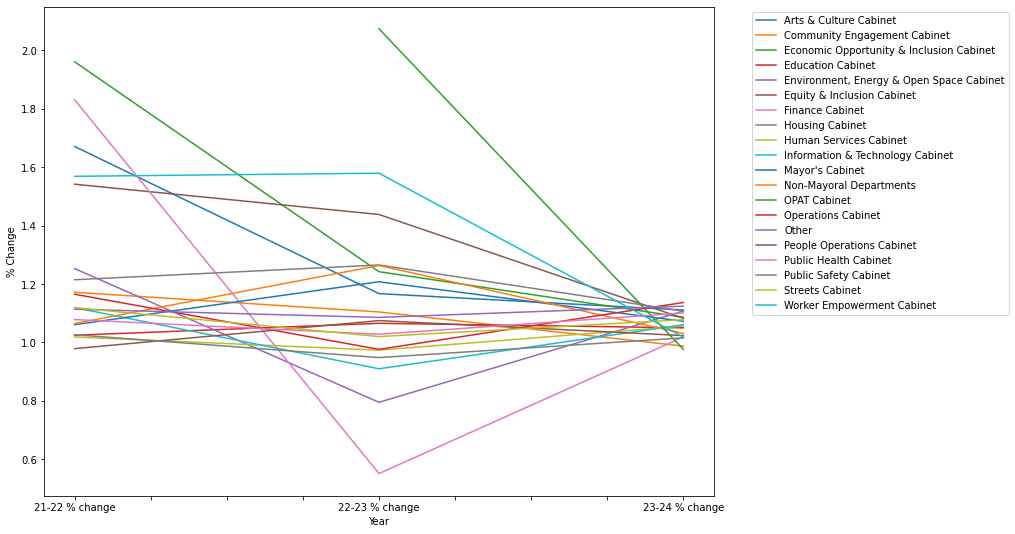

In [124]:
targets = []
for i in range(21, 24):
    target = f'{i}-{i+1} % change'
    targets.append(target)
    cabinets[target] = cabinets[f'FY{i+1}'] / cabinets[f'FY{i}']

ax = cabinets[targets].T.plot(figsize=(12, 9))
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_xlabel("Year");
ax.set_ylabel("% Change");

In [125]:
dpts = df.groupby(['Cabinet', 'Dept'])[list(renamed_cols.values())].sum()
dpts.sort_values(by='FY24', ascending=False)

FY21  \
Cabinet                    Dept                                      
Education Cabinet          Boston Public Schools      1.260001e+09   
Public Safety Cabinet      Police Department          4.228726e+08   
Other                      Pensions                   2.920888e+08   
                           Charter School Tuition     2.176984e+08   
Public Safety Cabinet      Fire Department            2.689599e+08   
...                                                            ...   
Other                      Housing Trust Fund         5.761958e+05   
Equity & Inclusion Cabinet Human Right Commission     1.948281e+05   
                           Fair Housing & Equity      1.903096e+05   
People Operations Cabinet  Unemployment Compensation  5.282123e+05   
Non-Mayoral Departments    Finance Commission         2.934898e+05   

                                                              FY22  \
Cabinet                    Dept                                      
Education Cabinet          Boston Public Schools      1.290907e+09   
Public Safety Cabinet      Police Department          4.203729e+08   
Other                      Pensions                   3.236842e+08   
                           Charter School Tuition     2.298422e+08   
Public Safety Cabinet      Fire Department            2.895138e+08   
...                                                            ...   
Other                      Housing Trust Fund         5.254049e+05   
Equity & Inclusion Cabinet Human Right Commission     3.645124e+05   
                           Fair Housing & Equity      4.839971e+05   
People Operations Cabinet  Unemployment Compensation  1.901616e+05   
Non-Mayoral Departments    Finance Commission         3.042139e+05   

                                                              FY23  \
Cabinet                    Dept                                      
Education Cabinet          Boston Public Schools      1.375294e+09   
Public Safety Cabinet      Police Department          3.958694e+08   
Other                      Pensions                   3.538559e+08   
                           Charter School Tuition     2.644984e+08   
Public Safety Cabinet      Fire Department            2.769016e+08   
...                                                            ...   
Other                      Housing Trust Fund         6.180000e+05   
Equity & Inclusion Cabinet Human Right Commission     6.300460e+05   
                           Fair Housing & Equity      5.332460e+05   
People Operations Cabinet  Unemployment Compensation  3.500000e+05   
Non-Mayoral Departments    Finance Commission         3.182662e+05   

                                                              FY24  
Cabinet                    Dept                                     
Education Cabinet          Boston Public Schools      1.444051e+09  
Public Safety Cabinet      Police Department          4.049348e+08  
Other                      Pensions                   3.905328e+08  
                           Charter School Tuition     2.804161e+08  
Public Safety Cabinet      Fire Department            2.780661e+08  
...                                                            ...  
Other                      Housing Trust Fund         6.180000e+05  
Equity & Inclusion Cabinet Human Right Commission     6.163948e+05  
                           Fair Housing & Equity      4.852776e+05  
People Operations Cabinet  Unemployment Compensation  3.500000e+05  
Non-Mayoral Departments    Finance Commission         3.233613e+05  

[67 rows x 4 columns]

In [6]:
df2 = pd.read_csv("data/fy24-capital-budget-plan-recommended.csv")
df2.head()

,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,Grant_Existing,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
0,Boston Centers for Youth and Families,BCYF Security and Technology Upgrades,Improvements to technology infrastructure and ...,Boston Centers for Youth and Families,To Be Scheduled,Citywide,750000,1250000,0,0,...,0,0,100000,1900000,0,0,0,0,0,2000000
1,Boston Centers for Youth and Families,BCYF Tobin Community Center Retaining Wall,Repair or replace the retaining wall adjacent ...,Public Facilities Department,In Design,Mission Hill,1800000,0,0,0,...,0,100000,1500000,200000,0,0,0,0,0,1800000
2,Boston Centers for Youth and Families,BCYF North End Community Center,Develop a design for a new North End Community...,Public Facilities Department,In Design,North End,5000000,63000000,0,0,...,0,400000,3000000,64600000,0,0,0,0,20000000,88000000
3,Boston Centers for Youth and Families,Pool Repairs,Renovate and upgrade locker rooms and pools in...,Boston Centers for Youth and Families,Annual Program,Citywide,1300000,1000000,0,0,...,383450,450000,700000,766550,0,0,0,0,0,2300000
4,Boston Centers for Youth and Families,Youth Budget Round 4,Engage youth across the City to create a capit...,Youth Engagement and Employment,Implementation Underway,Citywide,1000000,0,0,0,...,17140,25000,250000,707860,0,0,0,0,0,1000000


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Department              433 non-null    object
 1   Project_Name            433 non-null    object
 2   Scope_Of_Work           433 non-null    object
 3   PM_Department           433 non-null    object
 4   Project_Status          433 non-null    object
 5   Neighborhood            433 non-null    object
 6   Authorization_Existing  433 non-null    int64 
 7   Authorization_FY        433 non-null    int64 
 8   Authorization_Future    433 non-null    int64 
 9    Grant_Existing         433 non-null    int64 
 10   Grant_FY               433 non-null    int64 
 11   Grant_Future           433 non-null    int64 
 12  GO_Expended             433 non-null    int64 
 13  Capital_Year_0          433 non-null    int64 
 14   CapitalYear_1          433 non-null    int64 
 15  Capita